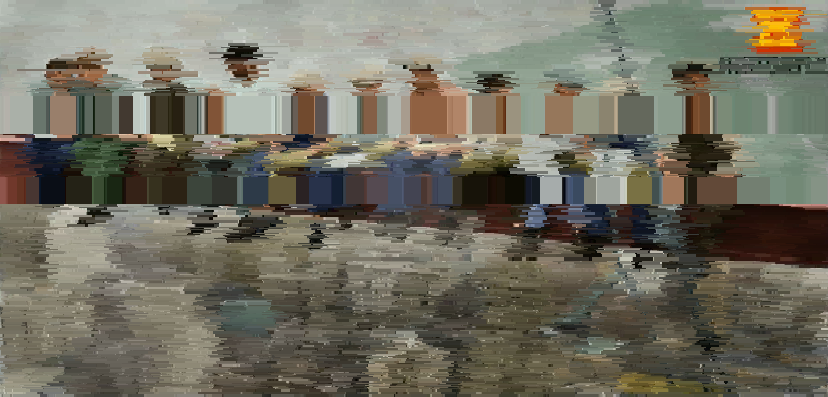

In [61]:
import numpy as numpy
import random
from PIL import Image

image = Image.open("421b2e6b07660810092a5d5fc7e3087f.jpg")
data = numpy.asarray(image)
orig = numpy.copy(data)
height = data.shape[0]
width = data.shape[1]

verticalSplits = random.randrange(100,500)
horizontalSplits = random.randrange(10,500)

pieces = []
for idx in range(verticalSplits-1):
    val = random.randint(1,int(height-sum(pieces)-verticalSplits+idx))
    while val >= height/100:
        val = random.randint(1,int(height-sum(pieces)-verticalSplits+idx))
    pieces.append(val)
while abs(sum(pieces)-height) > 5:
    workingSpace = abs(sum(pieces)-height)
    splits = int(workingSpace/2)
    npieces = []
    for idx in range(splits-1):
        val = random.randint(1,int(workingSpace-sum(npieces)-splits+idx))
        while val >= 50:
            val = random.randint(1,int(workingSpace-sum(npieces)-splits+idx))
        npieces.append(val)
    pieces = pieces + npieces
pieces.append(height-sum(pieces))
random.shuffle(pieces)

prev = 0
for row in pieces:
    hpieces = []
    for idx in range(horizontalSplits-1):
        val = random.randint(1,width-sum(hpieces)-horizontalSplits+idx)
        while val >= width/30:
            val = random.randint(1,width-sum(hpieces)-horizontalSplits+idx)
        hpieces.append(val)
    while abs(sum(hpieces)-width) > 5:
        workingSpace = abs(sum(hpieces)-width)
        splits = int(workingSpace/2)
        npieces = []
        for idx in range(splits-1):
            val = random.randint(1,int(workingSpace-sum(npieces)-splits+idx))
            while val >= 50:
                val = random.randint(1,int(workingSpace-sum(npieces)-splits+idx))
            npieces.append(val)
        hpieces = hpieces + npieces
    hpieces.append(width-sum(hpieces))
    random.shuffle(hpieces)
    prevc = 0
    for col in hpieces:
        data[prev:row+prev, prevc:prevc+col, :] = numpy.mean(data[prev:row+prev, prevc:prevc+col, :][0], axis=0)
        prevc = col+prevc
    prev = row+prev

final = Image.fromarray(data)
final

here


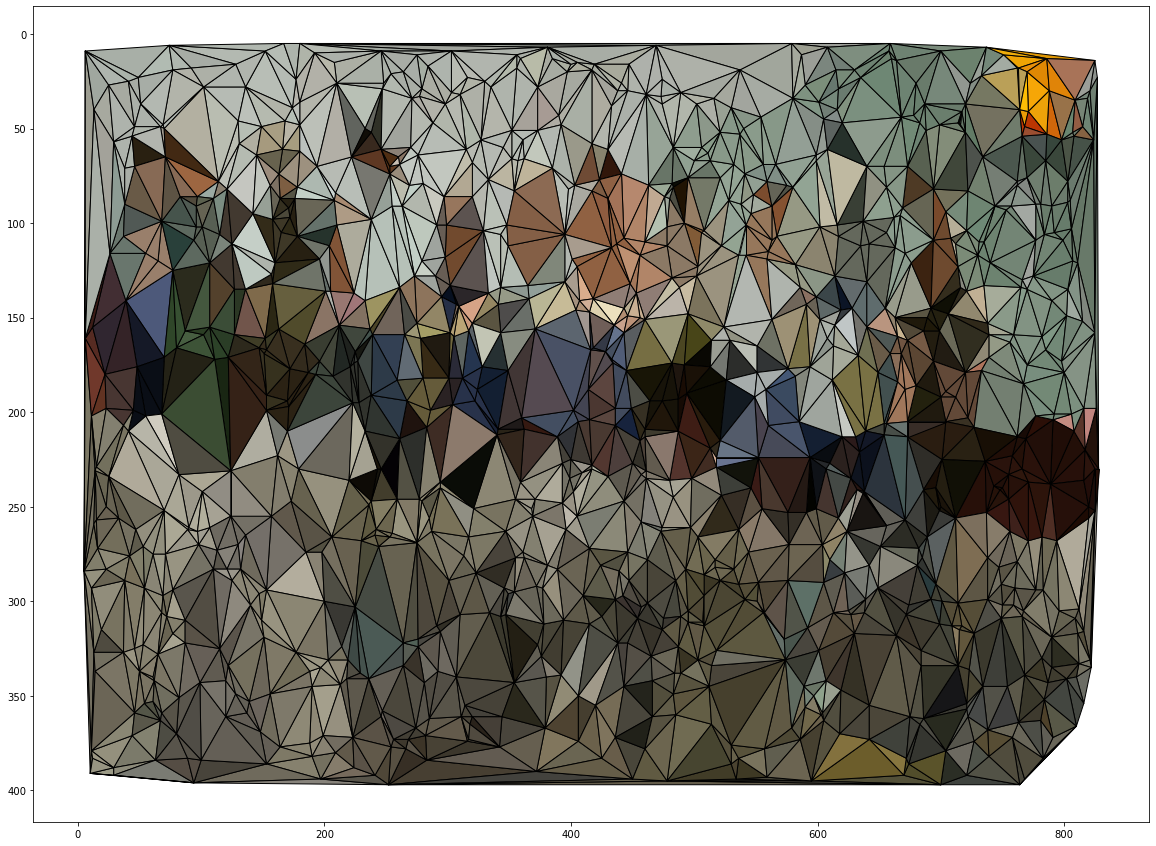

In [63]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from copy import copy

fig, ax = plt.subplots(figsize=(20,15), facecolor="w")
print("here")
x = numpy.array([random.randint(5, width) for n in range(1000)])
y = numpy.array([random.randint(5, height) for n in range(1000)])
points = numpy.array((x,y)).T
tri = Delaunay(points)

rawcolors = []
for j, s in enumerate(tri.simplices):
    xs = []
    ys = []
    for pi in s:
        point = points[pi]
        xs.append(point[0])
        ys.append(point[1])
    center = (int(sum(xs)/3), int(sum(ys)/3))
    rawcolors.append(data[center[1],center[0]])
colors = numpy.array(rawcolors) / 255

vertices = numpy.stack((
    tri.points[tri.simplices, 0], # x
    tri.points[tri.simplices, 1], # y
), axis=-1)

collection = PolyCollection(vertices, edgecolor="k")
collection.set_facecolor(colors)
plt.gca().invert_yaxis()

ax.add_collection(copy(collection))
ax.autoscale_view()